In [1]:
!pip install pandas
!pip install spacy
!pip install pandas numpy matplotlib seaborn
!pip install nltk
!pip install gensim
!pip install wordcloud
!pip install scikit-learn
!pip install textblob

In [2]:
import pandas as pd
import csv

df = pd.read_csv("reddit_opinion_PSE_ISR.csv")

/Users/kc/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/var/folders/7t/38b010_102j96znl8m55zqgm0000gn/T/ipykernel_7260/3207196358.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("reddit_opinion_PSE_ISR.csv")


In [3]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369534 entries, 0 to 2369533
Data columns (total 24 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   comment_id                  object 
 1   score                       int64  
 2   self_text                   object 
 3   subreddit                   object 
 4   created_time                object 
 5   post_id                     object 
 6   author_name                 object 
 7   controversiality            int64  
 8   ups                         int64  
 9   downs                       int64  
 10  user_is_verified            object 
 11  user_account_created_time   object 
 12  user_awardee_karma          float64
 13  user_awarder_karma          float64
 14  user_link_karma             float64
 15  user_comment_karma          float64
 16  user_total_karma            float64
 17  post_score                  int64  
 18  post_self_text              object 
 19  post_title           

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,...,user_link_karma,user_comment_karma,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time
0,m9mjrvh,1,their voices are absolutely beautiful,Palestine,2025-01-28 12:34:45,1ibxz5b,SpicyStrawberryJuice,0,1,0,...,7989.0,29359.0,38281.0,104,NaN,My Hometown GAZA !,0.98,104,0,2025-01-28 09:39:56
1,m9mjr1o,1,I was naming the historical reasons. Neither E...,IsraelPalestine,2025-01-28 12:34:36,1ibowon,blumieplume,0,1,0,...,67.0,21266.0,21333.0,61,I'm aware of the arguments on both sides of th...,Why is it so uniquely bad for Palestinians to ...,0.75,61,0,2025-01-28 00:32:24
2,m9mjoz9,1,ya got brainwashed pardner,IsraelPalestine,2025-01-28 12:34:11,1iauv0x,john_wallcroft,0,1,0,...,2480.0,39610.0,42689.0,15,Who do we truly believe is alive from the Isra...,Psychological Warfare,0.75,15,0,2025-01-27 00:19:11
3,m9mjn0s,1,are Palestinians still living in Jordan and Eg...,IsraelPalestine,2025-01-28 12:33:47,1ibowon,allthingsgood28,0,1,0,...,11.0,-100.0,-89.0,61,I'm aware of the arguments on both sides of th...,Why is it so uniquely bad for Palestinians to ...,0.75,61,0,2025-01-28 00:32:24
4,m9mjm07,1,The excuse that the Palestinians have a valid ...,IsraelPalestine,2025-01-28 12:33:34,1ibutry,Lexiesmom0824,0,1,0,...,164.0,4433.0,4597.0,2,"Realistically, this conflict only ends with a ...",Thoughts on a refined Clinton Proposal? How wo...,0.75,2,0,2025-01-28 05:45:51


# Data Cleaning

Find missing values

In [4]:
missing_values = pd.DataFrame({
    "Missing Values": df.isna().sum(),
    "Percentage (%)": (df.isna().sum() / len(df)) * 100
})

print("--- Missing Values Per Column ---")
print(missing_values)

print("\n--- Rows with NAs ---")
print(df[df.isna().any(axis=1)])

--- Missing Values Per Column ---
                            Missing Values  Percentage (%)
comment_id                               0        0.000000
score                                    0        0.000000
self_text                               12        0.000506
subreddit                                0        0.000000
created_time                             0        0.000000
post_id                                  0        0.000000
author_name                              0        0.000000
controversiality                         0        0.000000
ups                                      0        0.000000
downs                                    0        0.000000
user_is_verified                         1        0.000042
user_account_created_time           109504        4.621331
user_awardee_karma                     355        0.014982
user_awarder_karma                     355        0.014982
user_link_karma                        355        0.014982
user_comment_karma    

In [5]:
print(df.columns)

Index(['comment_id', 'score', 'self_text', 'subreddit', 'created_time',
       'post_id', 'author_name', 'controversiality', 'ups', 'downs',
       'user_is_verified', 'user_account_created_time', 'user_awardee_karma',
       'user_awarder_karma', 'user_link_karma', 'user_comment_karma',
       'user_total_karma', 'post_score', 'post_self_text', 'post_title',
       'post_upvote_ratio', 'post_thumbs_ups', 'post_total_awards_received',
       'post_created_time'],
      dtype='object')


In [6]:
numeric_cols = ["user_link_karma", "user_comment_karma", "user_total_karma"]
df[numeric_cols] = df[numeric_cols].fillna(0)

df

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,...,user_link_karma,user_comment_karma,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time
0,m9mjrvh,1,their voices are absolutely beautiful,Palestine,2025-01-28 12:34:45,1ibxz5b,SpicyStrawberryJuice,0,1,0,...,7989.0,29359.0,38281.0,104,NaN,My Hometown GAZA !,0.98,104,0,2025-01-28 09:39:56
1,m9mjr1o,1,I was naming the historical reasons. Neither E...,IsraelPalestine,2025-01-28 12:34:36,1ibowon,blumieplume,0,1,0,...,67.0,21266.0,21333.0,61,I'm aware of the arguments on both sides of th...,Why is it so uniquely bad for Palestinians to ...,0.75,61,0,2025-01-28 00:32:24
2,m9mjoz9,1,ya got brainwashed pardner,IsraelPalestine,2025-01-28 12:34:11,1iauv0x,john_wallcroft,0,1,0,...,2480.0,39610.0,42689.0,15,Who do we truly believe is alive from the Isra...,Psychological Warfare,0.75,15,0,2025-01-27 00:19:11
3,m9mjn0s,1,are Palestinians still living in Jordan and Eg...,IsraelPalestine,2025-01-28 12:33:47,1ibowon,allthingsgood28,0,1,0,...,11.0,-100.0,-89.0,61,I'm aware of the arguments on both sides of th...,Why is it so uniquely bad for Palestinians to ...,0.75,61,0,2025-01-28 00:32:24
4,m9mjm07,1,The excuse that the Palestinians have a valid ...,IsraelPalestine,2025-01-28 12:33:34,1ibutry,Lexiesmom0824,0,1,0,...,164.0,4433.0,4597.0,2,"Realistically, this conflict only ends with a ...",Thoughts on a refined Clinton Proposal? How wo...,0.75,2,0,2025-01-28 05:45:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369529,jyt47gw,64,Something similar happened in Sweden recently.,ActualPublicFreakouts,2023-09-02 13:57:37,1680ip7,RevolutionarySoil11,0,64,0,...,1155.0,15755.0,17768.0,597,NaN,Eritrean immigrants (illegals) fighting in the...,0.94,597,0,2023-09-02 11:52:49
2369530,jyt10so,214,They should leave the anger and hatred back wh...,ActualPublicFreakouts,2023-09-02 13:33:15,1680ip7,theXsquid,0,214,0,...,27271.0,134499.0,164342.0,597,NaN,Eritrean immigrants (illegals) fighting in the...,0.94,597,0,2023-09-02 11:52:49
2369531,jyszx3n,71,Something similar happened in Germany recently...,ActualPublicFreakouts,2023-09-02 13:24:53,1680ip7,P3ric,0,71,0,...,12875.0,4938.0,18955.0,597,NaN,Eritrean immigrants (illegals) fighting in the...,0.94,597,0,2023-09-02 11:52:49
2369532,jysrra4,120,Who are the yellow shirts? The referees?,ActualPublicFreakouts,2023-09-02 12:17:34,1680ip7,[deleted],0,120,0,...,0.0,0.0,0.0,597,NaN,Eritrean immigrants (illegals) fighting in the...,0.94,597,0,2023-09-02 11:52:49


Convert Data Types

In [7]:
df["score"] = df["score"].astype(int)
df["ups"] = df["ups"].astype(int)
df["downs"] = df["downs"].astype(int)
df["post_score"] = df["post_score"].astype(int)
df["user_link_karma"] = df["user_link_karma"].astype(float)
df["user_comment_karma"] = df["user_comment_karma"].astype(float)
df["user_total_karma"] = df["user_total_karma"].astype(float)
df["controversiality"] = df["controversiality"].astype(int)
df.head()

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,...,user_link_karma,user_comment_karma,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time
0,m9mjrvh,1,their voices are absolutely beautiful,Palestine,2025-01-28 12:34:45,1ibxz5b,SpicyStrawberryJuice,0,1,0,...,7989.0,29359.0,38281.0,104,NaN,My Hometown GAZA !,0.98,104,0,2025-01-28 09:39:56
1,m9mjr1o,1,I was naming the historical reasons. Neither E...,IsraelPalestine,2025-01-28 12:34:36,1ibowon,blumieplume,0,1,0,...,67.0,21266.0,21333.0,61,I'm aware of the arguments on both sides of th...,Why is it so uniquely bad for Palestinians to ...,0.75,61,0,2025-01-28 00:32:24
2,m9mjoz9,1,ya got brainwashed pardner,IsraelPalestine,2025-01-28 12:34:11,1iauv0x,john_wallcroft,0,1,0,...,2480.0,39610.0,42689.0,15,Who do we truly believe is alive from the Isra...,Psychological Warfare,0.75,15,0,2025-01-27 00:19:11
3,m9mjn0s,1,are Palestinians still living in Jordan and Eg...,IsraelPalestine,2025-01-28 12:33:47,1ibowon,allthingsgood28,0,1,0,...,11.0,-100.0,-89.0,61,I'm aware of the arguments on both sides of th...,Why is it so uniquely bad for Palestinians to ...,0.75,61,0,2025-01-28 00:32:24
4,m9mjm07,1,The excuse that the Palestinians have a valid ...,IsraelPalestine,2025-01-28 12:33:34,1ibutry,Lexiesmom0824,0,1,0,...,164.0,4433.0,4597.0,2,"Realistically, this conflict only ends with a ...",Thoughts on a refined Clinton Proposal? How wo...,0.75,2,0,2025-01-28 05:45:51


Convert timestamps to datetime

In [8]:
df["created_time"] = pd.to_datetime(df["created_time"], errors="coerce")
df["post_created_time"] = pd.to_datetime(df["post_created_time"], errors="coerce")

Standardize Text

In [9]:
text_columns = ["subreddit", "author_name", "post_title", "self_text"]
for col in text_columns:
    df[col] = df[col].astype(str).str.strip()
    
df

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,...,user_link_karma,user_comment_karma,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time
0,m9mjrvh,1,their voices are absolutely beautiful,Palestine,2025-01-28 12:34:45,1ibxz5b,SpicyStrawberryJuice,0,1,0,...,7989.0,29359.0,38281.0,104,NaN,My Hometown GAZA !,0.98,104,0,2025-01-28 09:39:56
1,m9mjr1o,1,I was naming the historical reasons. Neither E...,IsraelPalestine,2025-01-28 12:34:36,1ibowon,blumieplume,0,1,0,...,67.0,21266.0,21333.0,61,I'm aware of the arguments on both sides of th...,Why is it so uniquely bad for Palestinians to ...,0.75,61,0,2025-01-28 00:32:24
2,m9mjoz9,1,ya got brainwashed pardner,IsraelPalestine,2025-01-28 12:34:11,1iauv0x,john_wallcroft,0,1,0,...,2480.0,39610.0,42689.0,15,Who do we truly believe is alive from the Isra...,Psychological Warfare,0.75,15,0,2025-01-27 00:19:11
3,m9mjn0s,1,are Palestinians still living in Jordan and Eg...,IsraelPalestine,2025-01-28 12:33:47,1ibowon,allthingsgood28,0,1,0,...,11.0,-100.0,-89.0,61,I'm aware of the arguments on both sides of th...,Why is it so uniquely bad for Palestinians to ...,0.75,61,0,2025-01-28 00:32:24
4,m9mjm07,1,The excuse that the Palestinians have a valid ...,IsraelPalestine,2025-01-28 12:33:34,1ibutry,Lexiesmom0824,0,1,0,...,164.0,4433.0,4597.0,2,"Realistically, this conflict only ends with a ...",Thoughts on a refined Clinton Proposal? How wo...,0.75,2,0,2025-01-28 05:45:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369529,jyt47gw,64,Something similar happened in Sweden recently.,ActualPublicFreakouts,2023-09-02 13:57:37,1680ip7,RevolutionarySoil11,0,64,0,...,1155.0,15755.0,17768.0,597,NaN,Eritrean immigrants (illegals) fighting in the...,0.94,597,0,2023-09-02 11:52:49
2369530,jyt10so,214,They should leave the anger and hatred back wh...,ActualPublicFreakouts,2023-09-02 13:33:15,1680ip7,theXsquid,0,214,0,...,27271.0,134499.0,164342.0,597,NaN,Eritrean immigrants (illegals) fighting in the...,0.94,597,0,2023-09-02 11:52:49
2369531,jyszx3n,71,Something similar happened in Germany recently...,ActualPublicFreakouts,2023-09-02 13:24:53,1680ip7,P3ric,0,71,0,...,12875.0,4938.0,18955.0,597,NaN,Eritrean immigrants (illegals) fighting in the...,0.94,597,0,2023-09-02 11:52:49
2369532,jysrra4,120,Who are the yellow shirts? The referees?,ActualPublicFreakouts,2023-09-02 12:17:34,1680ip7,[deleted],0,120,0,...,0.0,0.0,0.0,597,NaN,Eritrean immigrants (illegals) fighting in the...,0.94,597,0,2023-09-02 11:52:49


Remove Duplicates

In [10]:
df["comment_id"].duplicated().any()

False

In [11]:
deleted_count = (df['author_name'] == '[deleted]').sum()

print(f"Number of comments with author_name as [deleted]: {deleted_count}")

Number of comments with author_name as [deleted]: 8117


 Standardize Text Data

In [12]:
df['self_text'] = df['self_text'].str.capitalize()
df

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,...,user_link_karma,user_comment_karma,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time
0,m9mjrvh,1,Their voices are absolutely beautiful,Palestine,2025-01-28 12:34:45,1ibxz5b,SpicyStrawberryJuice,0,1,0,...,7989.0,29359.0,38281.0,104,NaN,My Hometown GAZA !,0.98,104,0,2025-01-28 09:39:56
1,m9mjr1o,1,I was naming the historical reasons. neither e...,IsraelPalestine,2025-01-28 12:34:36,1ibowon,blumieplume,0,1,0,...,67.0,21266.0,21333.0,61,I'm aware of the arguments on both sides of th...,Why is it so uniquely bad for Palestinians to ...,0.75,61,0,2025-01-28 00:32:24
2,m9mjoz9,1,Ya got brainwashed pardner,IsraelPalestine,2025-01-28 12:34:11,1iauv0x,john_wallcroft,0,1,0,...,2480.0,39610.0,42689.0,15,Who do we truly believe is alive from the Isra...,Psychological Warfare,0.75,15,0,2025-01-27 00:19:11
3,m9mjn0s,1,Are palestinians still living in jordan and eg...,IsraelPalestine,2025-01-28 12:33:47,1ibowon,allthingsgood28,0,1,0,...,11.0,-100.0,-89.0,61,I'm aware of the arguments on both sides of th...,Why is it so uniquely bad for Palestinians to ...,0.75,61,0,2025-01-28 00:32:24
4,m9mjm07,1,The excuse that the palestinians have a valid ...,IsraelPalestine,2025-01-28 12:33:34,1ibutry,Lexiesmom0824,0,1,0,...,164.0,4433.0,4597.0,2,"Realistically, this conflict only ends with a ...",Thoughts on a refined Clinton Proposal? How wo...,0.75,2,0,2025-01-28 05:45:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369529,jyt47gw,64,Something similar happened in sweden recently.,ActualPublicFreakouts,2023-09-02 13:57:37,1680ip7,RevolutionarySoil11,0,64,0,...,1155.0,15755.0,17768.0,597,NaN,Eritrean immigrants (illegals) fighting in the...,0.94,597,0,2023-09-02 11:52:49
2369530,jyt10so,214,They should leave the anger and hatred back wh...,ActualPublicFreakouts,2023-09-02 13:33:15,1680ip7,theXsquid,0,214,0,...,27271.0,134499.0,164342.0,597,NaN,Eritrean immigrants (illegals) fighting in the...,0.94,597,0,2023-09-02 11:52:49
2369531,jyszx3n,71,Something similar happened in germany recently...,ActualPublicFreakouts,2023-09-02 13:24:53,1680ip7,P3ric,0,71,0,...,12875.0,4938.0,18955.0,597,NaN,Eritrean immigrants (illegals) fighting in the...,0.94,597,0,2023-09-02 11:52:49
2369532,jysrra4,120,Who are the yellow shirts? the referees?,ActualPublicFreakouts,2023-09-02 12:17:34,1680ip7,[deleted],0,120,0,...,0.0,0.0,0.0,597,NaN,Eritrean immigrants (illegals) fighting in the...,0.94,597,0,2023-09-02 11:52:49


Preprocessing using RegEx and spaCy and Lemmatization

In [13]:
import re
from string import punctuation
import spacy
!python -m spacy download en
nlp = spacy.load('en_core_web_sm')
stop_words = nlp.Defaults.stop_words

import nltk

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 3.7 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


[nltk_data] Downloading package punkt to /Users/kc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/kc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/kc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/kc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kc/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [14]:
import re
import html

def clean(text):
# Removes all special characters and numericals, keeping only alphabetic characters
    text = html.unescape(text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    text = re.sub(r'\s+', ' ', text) 
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    unwanted_words = ['news', 'source', 'org', 'com', 'www']
    text = " ".join([word for word in text.split() if word.lower() not in unwanted_words])
    text = re.sub(r"\s+", " ", text) #single space
    return text

# Apply the cleaning function to the 'self text' column and create a new column 'Cleaned text'
df['cleaned_text'] = df['self_text'].apply(clean)
df.head()

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,...,user_comment_karma,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time,cleaned_text
0,m9mjrvh,1,Their voices are absolutely beautiful,Palestine,2025-01-28 12:34:45,1ibxz5b,SpicyStrawberryJuice,0,1,0,...,29359.0,38281.0,104,NaN,My Hometown GAZA !,0.98,104,0,2025-01-28 09:39:56,Their voices are absolutely beautiful
1,m9mjr1o,1,I was naming the historical reasons. neither e...,IsraelPalestine,2025-01-28 12:34:36,1ibowon,blumieplume,0,1,0,...,21266.0,21333.0,61,I'm aware of the arguments on both sides of th...,Why is it so uniquely bad for Palestinians to ...,0.75,61,0,2025-01-28 00:32:24,I was naming the historical reasons neither eg...
2,m9mjoz9,1,Ya got brainwashed pardner,IsraelPalestine,2025-01-28 12:34:11,1iauv0x,john_wallcroft,0,1,0,...,39610.0,42689.0,15,Who do we truly believe is alive from the Isra...,Psychological Warfare,0.75,15,0,2025-01-27 00:19:11,Ya got brainwashed pardner
3,m9mjn0s,1,Are palestinians still living in jordan and eg...,IsraelPalestine,2025-01-28 12:33:47,1ibowon,allthingsgood28,0,1,0,...,-100.0,-89.0,61,I'm aware of the arguments on both sides of th...,Why is it so uniquely bad for Palestinians to ...,0.75,61,0,2025-01-28 00:32:24,Are palestinians still living in jordan and eg...
4,m9mjm07,1,The excuse that the palestinians have a valid ...,IsraelPalestine,2025-01-28 12:33:34,1ibutry,Lexiesmom0824,0,1,0,...,4433.0,4597.0,2,"Realistically, this conflict only ends with a ...",Thoughts on a refined Clinton Proposal? How wo...,0.75,2,0,2025-01-28 05:45:51,The excuse that the palestinians have a valid ...


In [15]:
standard_stopwords = set(stopwords.words('english'))
custom_stopwords = {
    'say', 'think', 'know', 'thing', 'see', 'look', 'actually', 'point', 'maybe',
    'yeah', 'way', 'go', 'get', 'take', 'give', 'tell', 'gt', 'ye', 't', 'let', 'want', 'ask', 'need',
    'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being',
    'have', 'has', 'had', 'do', 'does', 'did',
    'can', 'could', 'will', 'would', 'shall', 'should', 'may', 'might', 'must', 'like', 'one', 'really', 'even', 'make', 'good'
}
stop_words = standard_stopwords.union(custom_stopwords)

In [16]:
pos_dict = {'J': wordnet.ADJ, 'V': wordnet.VERB, 'N': wordnet.NOUN, 'R': wordnet.ADV}

def token_stop_pos(text):
    # Tokenize the text and get POS tags
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')): # Remove stopwords
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

# Apply the POS tagging function to the 'Cleaned text' column
df['POS tagged'] = df['cleaned_text'].apply(token_stop_pos)

df.head()

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,...,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time,cleaned_text,POS tagged
0,m9mjrvh,1,Their voices are absolutely beautiful,Palestine,2025-01-28 12:34:45,1ibxz5b,SpicyStrawberryJuice,0,1,0,...,38281.0,104,NaN,My Hometown GAZA !,0.98,104,0,2025-01-28 09:39:56,Their voices are absolutely beautiful,"[(voices, n), (absolutely, r), (beautiful, a)]"
1,m9mjr1o,1,I was naming the historical reasons. neither e...,IsraelPalestine,2025-01-28 12:34:36,1ibowon,blumieplume,0,1,0,...,21333.0,61,I'm aware of the arguments on both sides of th...,Why is it so uniquely bad for Palestinians to ...,0.75,61,0,2025-01-28 00:32:24,I was naming the historical reasons neither eg...,"[(naming, v), (historical, a), (reasons, n), (..."
2,m9mjoz9,1,Ya got brainwashed pardner,IsraelPalestine,2025-01-28 12:34:11,1iauv0x,john_wallcroft,0,1,0,...,42689.0,15,Who do we truly believe is alive from the Isra...,Psychological Warfare,0.75,15,0,2025-01-27 00:19:11,Ya got brainwashed pardner,"[(Ya, n), (got, v), (brainwashed, v), (pardner..."
3,m9mjn0s,1,Are palestinians still living in jordan and eg...,IsraelPalestine,2025-01-28 12:33:47,1ibowon,allthingsgood28,0,1,0,...,-89.0,61,I'm aware of the arguments on both sides of th...,Why is it so uniquely bad for Palestinians to ...,0.75,61,0,2025-01-28 00:32:24,Are palestinians still living in jordan and eg...,"[(palestinians, n), (still, r), (living, v), (..."
4,m9mjm07,1,The excuse that the palestinians have a valid ...,IsraelPalestine,2025-01-28 12:33:34,1ibutry,Lexiesmom0824,0,1,0,...,4597.0,2,"Realistically, this conflict only ends with a ...",Thoughts on a refined Clinton Proposal? How wo...,0.75,2,0,2025-01-28 05:45:51,The excuse that the palestinians have a valid ...,"[(excuse, n), (palestinians, n), (valid, a), (..."


In [17]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize the words with their POS tags
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

# Apply the lemmatization function to the 'POS tagged' column
df['Lemma'] = df['POS tagged'].apply(lemmatize)

df.head()

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,...,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time,cleaned_text,POS tagged,Lemma
0,m9mjrvh,1,Their voices are absolutely beautiful,Palestine,2025-01-28 12:34:45,1ibxz5b,SpicyStrawberryJuice,0,1,0,...,104,NaN,My Hometown GAZA !,0.98,104,0,2025-01-28 09:39:56,Their voices are absolutely beautiful,"[(voices, n), (absolutely, r), (beautiful, a)]",voice absolutely beautiful
1,m9mjr1o,1,I was naming the historical reasons. neither e...,IsraelPalestine,2025-01-28 12:34:36,1ibowon,blumieplume,0,1,0,...,61,I'm aware of the arguments on both sides of th...,Why is it so uniquely bad for Palestinians to ...,0.75,61,0,2025-01-28 00:32:24,I was naming the historical reasons neither eg...,"[(naming, v), (historical, a), (reasons, n), (...",name historical reason neither egypt jordan ...
2,m9mjoz9,1,Ya got brainwashed pardner,IsraelPalestine,2025-01-28 12:34:11,1iauv0x,john_wallcroft,0,1,0,...,15,Who do we truly believe is alive from the Isra...,Psychological Warfare,0.75,15,0,2025-01-27 00:19:11,Ya got brainwashed pardner,"[(Ya, n), (got, v), (brainwashed, v), (pardner...",Ya get brainwash pardner
3,m9mjn0s,1,Are palestinians still living in jordan and eg...,IsraelPalestine,2025-01-28 12:33:47,1ibowon,allthingsgood28,0,1,0,...,61,I'm aware of the arguments on both sides of th...,Why is it so uniquely bad for Palestinians to ...,0.75,61,0,2025-01-28 00:32:24,Are palestinians still living in jordan and eg...,"[(palestinians, n), (still, r), (living, v), (...",palestinian still live jordan egypt yes egyp...
4,m9mjm07,1,The excuse that the palestinians have a valid ...,IsraelPalestine,2025-01-28 12:33:34,1ibutry,Lexiesmom0824,0,1,0,...,2,"Realistically, this conflict only ends with a ...",Thoughts on a refined Clinton Proposal? How wo...,0.75,2,0,2025-01-28 05:45:51,The excuse that the palestinians have a valid ...,"[(excuse, n), (palestinians, n), (valid, a), (...",excuse palestinian valid grievance attack ex...


In [18]:
df.head()

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,...,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time,cleaned_text,POS tagged,Lemma
0,m9mjrvh,1,Their voices are absolutely beautiful,Palestine,2025-01-28 12:34:45,1ibxz5b,SpicyStrawberryJuice,0,1,0,...,104,NaN,My Hometown GAZA !,0.98,104,0,2025-01-28 09:39:56,Their voices are absolutely beautiful,"[(voices, n), (absolutely, r), (beautiful, a)]",voice absolutely beautiful
1,m9mjr1o,1,I was naming the historical reasons. neither e...,IsraelPalestine,2025-01-28 12:34:36,1ibowon,blumieplume,0,1,0,...,61,I'm aware of the arguments on both sides of th...,Why is it so uniquely bad for Palestinians to ...,0.75,61,0,2025-01-28 00:32:24,I was naming the historical reasons neither eg...,"[(naming, v), (historical, a), (reasons, n), (...",name historical reason neither egypt jordan ...
2,m9mjoz9,1,Ya got brainwashed pardner,IsraelPalestine,2025-01-28 12:34:11,1iauv0x,john_wallcroft,0,1,0,...,15,Who do we truly believe is alive from the Isra...,Psychological Warfare,0.75,15,0,2025-01-27 00:19:11,Ya got brainwashed pardner,"[(Ya, n), (got, v), (brainwashed, v), (pardner...",Ya get brainwash pardner
3,m9mjn0s,1,Are palestinians still living in jordan and eg...,IsraelPalestine,2025-01-28 12:33:47,1ibowon,allthingsgood28,0,1,0,...,61,I'm aware of the arguments on both sides of th...,Why is it so uniquely bad for Palestinians to ...,0.75,61,0,2025-01-28 00:32:24,Are palestinians still living in jordan and eg...,"[(palestinians, n), (still, r), (living, v), (...",palestinian still live jordan egypt yes egyp...
4,m9mjm07,1,The excuse that the palestinians have a valid ...,IsraelPalestine,2025-01-28 12:33:34,1ibutry,Lexiesmom0824,0,1,0,...,2,"Realistically, this conflict only ends with a ...",Thoughts on a refined Clinton Proposal? How wo...,0.75,2,0,2025-01-28 05:45:51,The excuse that the palestinians have a valid ...,"[(excuse, n), (palestinians, n), (valid, a), (...",excuse palestinian valid grievance attack ex...


In [19]:
#df.to_csv('cleaned_Reddit_Opinion.csv', index=False)

In [20]:
print(df['subreddit'].unique())


['Palestine' 'IsraelPalestine' 'worldnews' 'NonCredibleDefense'
 'PublicFreakout' 'AskMiddleEast' 'TerrifyingAsFuck'
 'IsrealPalestineWar_23' 'worldnewsvideo' 'CrazyFuckingVideos'
 'CombatFootage' 'AbruptChaos' 'NoahGetTheBoat' 'ActualPublicFreakouts']


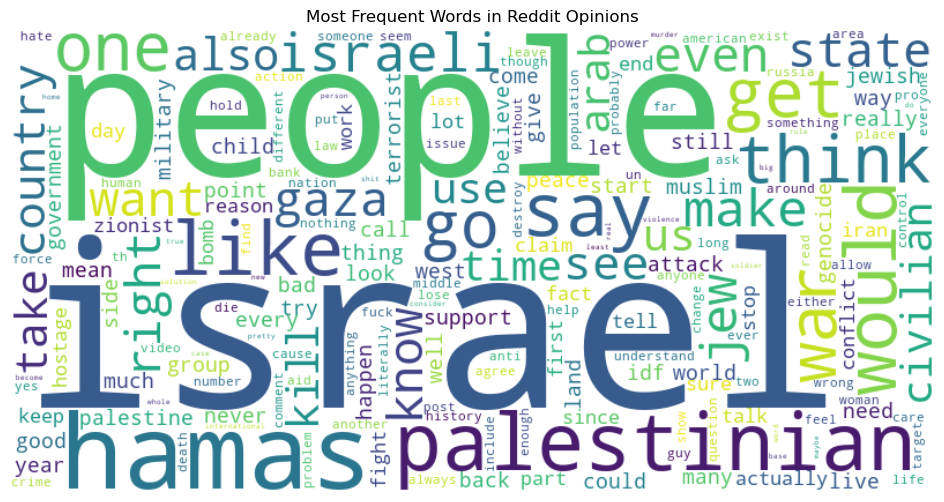

In [21]:
# --- Find Word Frequency ---

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
all_text = " ".join(df['Lemma'].dropna())
word_freq = Counter(all_text.split())

# --- Word Cloud Visualization ---
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Reddit Opinions")
plt.show()

In [22]:
# Select only the necessary columns for display and extraction
necessary_columns = ['cleaned_text', 'Lemma', 'post_title', 'subreddit', 'post_score', 'post_upvote_ratio', 'post_thumbs_ups']
df_cleaned = df[necessary_columns]

df_cleaned.to_csv("cleaned_reddit_opinion3.csv", index=False)

In [23]:
df_cleaned.head()

,cleaned_text,Lemma,post_title,subreddit,post_score,post_upvote_ratio,post_thumbs_ups
0,Their voices are absolutely beautiful,voice absolutely beautiful,My Hometown GAZA !,Palestine,104,0.98,104
1,I was naming the historical reasons neither eg...,name historical reason neither egypt jordan ...,Why is it so uniquely bad for Palestinians to ...,IsraelPalestine,61,0.75,61
2,Ya got brainwashed pardner,Ya get brainwash pardner,Psychological Warfare,IsraelPalestine,15,0.75,15
3,Are palestinians still living in jordan and eg...,palestinian still live jordan egypt yes egyp...,Why is it so uniquely bad for Palestinians to ...,IsraelPalestine,61,0.75,61
4,The excuse that the palestinians have a valid ...,excuse palestinian valid grievance attack ex...,Thoughts on a refined Clinton Proposal? How wo...,IsraelPalestine,2,0.75,2


In [24]:
def contains_http(text):
    return bool(re.search(r'http', text))  # Check if 'http' is still present in the text

# Create a new column to indicate if the text still contains "http"
df['contains_http'] = df['cleaned_text'].apply(contains_http)

# Display the result
print(df[['cleaned_text', 'contains_http']].head())

                                        cleaned_text  contains_http
0              Their voices are absolutely beautiful          False
1  I was naming the historical reasons neither eg...          False
2                         Ya got brainwashed pardner          False
3  Are palestinians still living in jordan and eg...          False
4  The excuse that the palestinians have a valid ...          False


In [25]:
def contains_http(text):
    return bool(re.search(r'org', text))  # Check if 'http' is still present in the text

# Create a new column to indicate if the text still contains "http"
df['contains_com'] = df['cleaned_text'].apply(contains_http)

# Display the result
print(df[['cleaned_text', 'contains_com']].head(10))

                                        cleaned_text  contains_com
0              Their voices are absolutely beautiful         False
1  I was naming the historical reasons neither eg...         False
2                         Ya got brainwashed pardner         False
3  Are palestinians still living in jordan and eg...         False
4  The excuse that the palestinians have a valid ...         False
5  Yes it is a reason to kill terrorists yes gaza...         False
6  Palestinians fought in the ottoman army agains...         False
7                          I approve of this message         False
8  Banking is not a crime its what jews ended up ...         False
9  Which makes it bit off they control so much te...         False
